
# Simple AutoEncoders with Image Data

Here is a simple autoencoder with just the dense layers.

Load the data and import the libraries.

In [6]:
#
# Import relevant Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
#

In [7]:
import keras
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
# Load MNIST data and store it in variables x_train, x_test. Note -  we do not need labels as it's autoencoder.

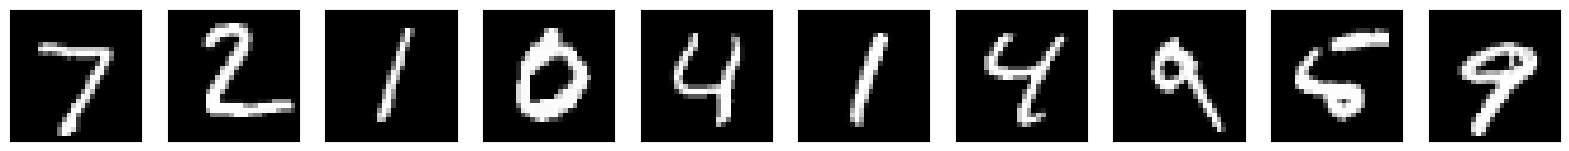

In [8]:
import matplotlib.pyplot as plt
# Plot a few data points
%matplotlib inline

n = 10  # Number of records that will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [9]:
# Normalize train data - Divide by 255
# Normalize test data - Divide by 255
x_train = x_train/255
x_test = x_test/255

## Basic AutoEncoder

Build a basic symmetric encoder-decoder network that recreates the image.  This network could be used in dimensionaliry reduction or feature learning. 

In [10]:
from tensorflow.keras import Sequential
from keras.layers import Flatten, Dense, Reshape
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

#
# Add as many hidden layers in the encoder network of your choise
#
#

encoder.add(Dense(400, activation = 'relu'))
encoder.add(Dense(200, activation = 'relu'))
encoder.add(Dense(100, activation = 'relu'))
encoder.add(Dense(50, activation = 'relu'))
encoder.add(Dense(25, activation = 'relu'))



# The last TWO layers of the encoder and decoder must be matched (see the following decoder cell.
#

In [11]:
# print the encoder model
encoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
Total params: 420625 (1.60 MB)
Trainable params: 42062

In [12]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add as many layers in the decoder as you want. Reember - Encoder and decoder need to be symmetric.
#
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(400, activation = 'relu'))


decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [13]:
# print the decoder model
decoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                1300      
                                                                 
 dense_6 (Dense)             (None, 100)               5100      
                                                                 
 dense_7 (Dense)             (None, 200)               20200     
                                                                 
 dense_8 (Dense)             (None, 400)               80400     
                                                                 
 dense_9 (Dense)             (None, 784)               314384    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 421384 (1.61 MB)
Trainable params: 42138

In [14]:
autoencoder = Sequential([encoder, decoder]) # Combine encoder and decoder together.


In [15]:
# print the autoencoder model
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 25)                420625    
                                                                 
 sequential_2 (Sequential)   (None, 28, 28)            421384    
                                                                 
Total params: 842009 (3.21 MB)
Trainable params: 842009 (3.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Compile the autoencoder. Use binary_crossentropy as loss and metrics as accuracy.
autoencoder.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = 'accuracy')

In [12]:
# Fit the autoencoder. Note - Input and output are same. x_train is your train data, x_test is your validation data.
history = autoencoder.fit(x_train,x_train, epochs= 50, validation_data = [x_test, x_test])

Epoch 1/50


1875/1875 [==============================] - 9s 4ms/step - loss: 0.1676 - accuracy: 0.1854 - val_loss: 0.1348 - val_accuracy: 0.2277
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1296 - accuracy: 0.2350 - val_loss: 0.1223 - val_accuracy: 0.2404
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1183 - accuracy: 0.2496 - val_loss: 0.1127 - val_accuracy: 0.2534
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1114 - accuracy: 0.2600 - val_loss: 0.1081 - val_accuracy: 0.2595
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1068 - accuracy: 0.2687 - val_loss: 0.1050 - val_accuracy: 0.2702
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1041 - accuracy: 0.2747 - val_loss: 0.1030 - val_accuracy: 0.2762
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1025 - accuracy: 0.2795 - val_loss: 0.1019 - val_accurac

313/313 [==============================] - 0s 1ms/step


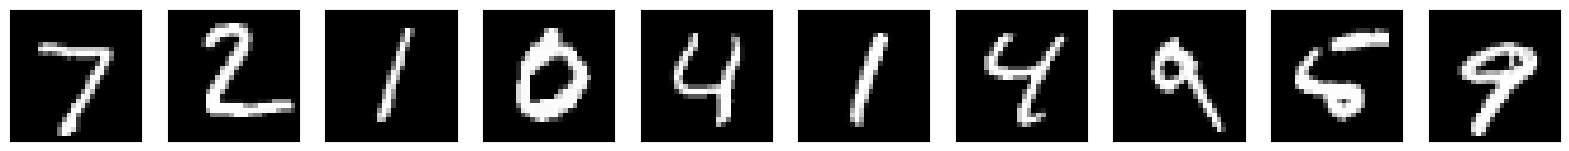

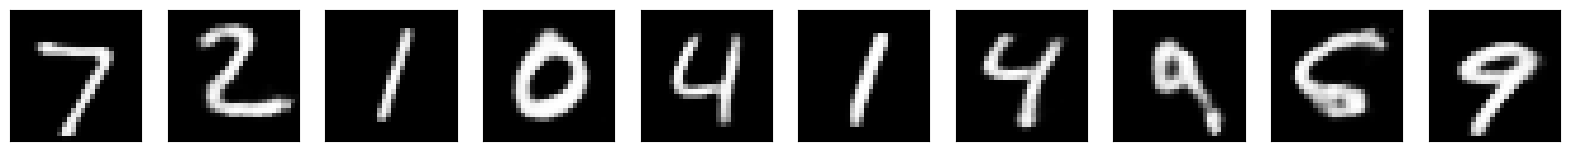

In [25]:
# Check a few sample images.
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    # 
    # Display original image - Just line sample code provided earlier.
    # 
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
for i in range(n):   
    # 
    # Display reconstruced (decoded) images. You need to slightly change your code.
    #
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


313/313 [==============================] - 2s 5ms/step


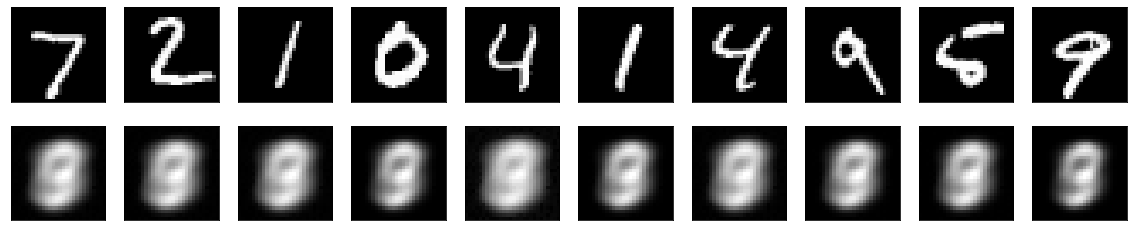

In [11]:
# Check a few sample images.
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    # 
    # Display original image - Just line sample code provided earlier.
    #

    # 
    # Display reconstruced (decoded) images. You need to slightly change your code.
    #
plt.show()

# AutoEncoders for Denoising Images

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 

In [17]:
from tensorflow.keras.layers import GaussianNoise

In [18]:
sample = GaussianNoise(0.2)
noisey = sample(x_test[0:2],training=True)

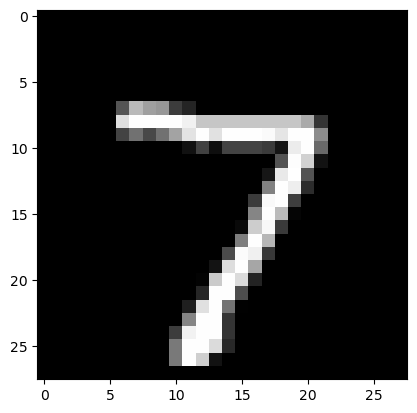

In [19]:
plt.imshow(x_test[0])

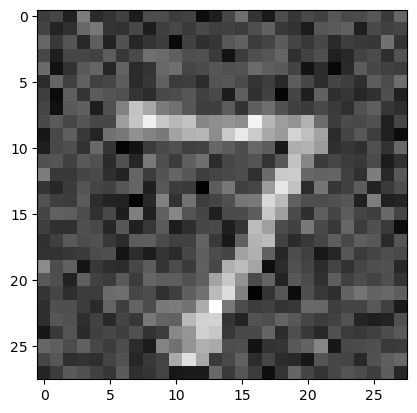

In [20]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

# Input - Images with noise
# Labels - Clean images.

In [21]:
from tensorflow.keras import Sequential
from keras.layers import Flatten, Dense, Reshape
import matplotlib.pyplot as plt
import keras

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy image

encoder.add(Dense(400, activation = 'relu'))
encoder.add(Dense(200, activation = 'relu'))
encoder.add(Dense(100, activation = 'relu'))
encoder.add(Dense(50, activation = 'relu'))
encoder.add(Dense(25, activation = 'relu'))

#
# Add layers of encoder network. You could use same number of layers as earlier.
#


In [22]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add layers of decoder network. You could use same number of layers as earlier.
#
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(400, activation = 'relu'))


decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [23]:
noise_remover = Sequential([encoder, decoder])

In [29]:
# Compile the network as earlier
autoencoder.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = 'binary_accuracy')

In [30]:
# Fit the network as earlier.
history = autoencoder.fit(x_train,x_train, batch_size =32, shuffle=True, epochs= 50, validation_data = [x_test, x_test])

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0837 - binary_accuracy: 0.8145 - val_loss: 0.0857 - val_binary_accuracy: 0.8133
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0835 - binary_accuracy: 0.8145 - val_loss: 0.0860 - val_binary_accuracy: 0.8132
Epoch 3/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0834 - binary_accuracy: 0.8145 - val_loss: 0.0866 - val_binary_accuracy: 0.8132
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0833 - binary_accuracy: 0.8145 - val_loss: 0.0858 - val_binary_accuracy: 0.8133
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0832 - binary_accuracy: 0.8146 - val_loss: 0.0858 - val_binary_accuracy: 0.8131
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0832 - binary_accuracy: 0.8146 - val_loss: 0.0858 - val_binary_accuracy: 0.8132
Epoch 7/50
1875/1875 [==============================

In [33]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


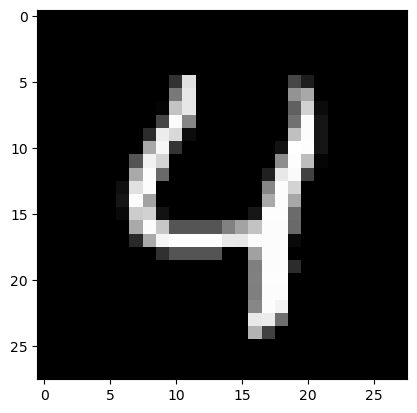

The Noisey Version


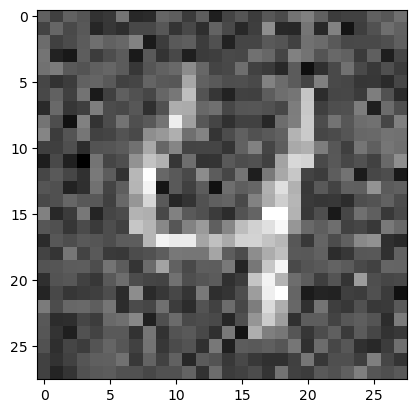

After going through denoiser


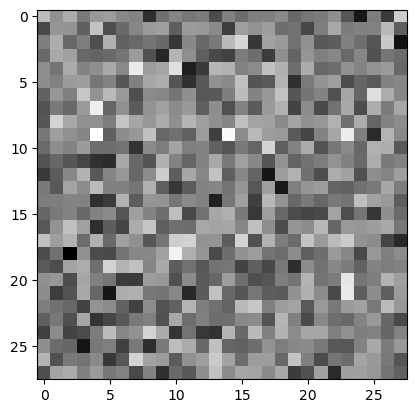

In [34]:
n = 4
print("The Original")
plt.imshow(x_test[n])
plt.show()


print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()


print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

## Lab Logbook requirement:

- Put the model summary for task 1 in you lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.